# What is the most optimal skill to learn for data analysts?

## Methodology

1. Group skills to determine median salary, and likelihood of being in posting
2. Visualize median salary versus percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [2]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/artbm01/Documents/Python-DataAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Analysis for Data Analyst in the United States

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [4]:
# Data cleaning
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_US_group = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median': 'median_salary'})
DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

In [6]:
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]


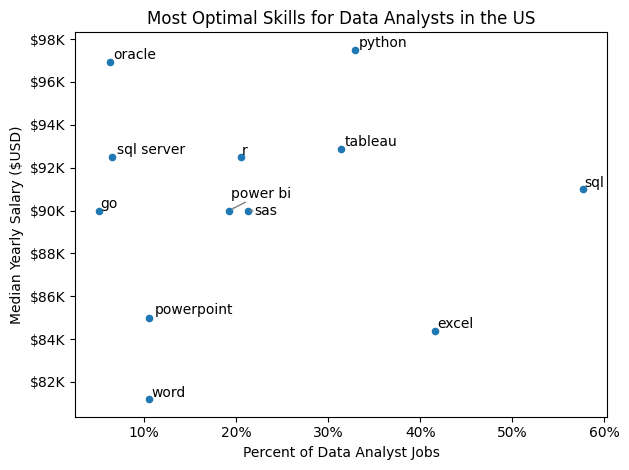

In [7]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts=[]

for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y / 1000:.0f}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

plt.tight_layout()
plt.show()

In [8]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ssis',
  'sharepoint',
  'excel',
  'sas',
  'spreadsheet',
  'dax',
  'spss',
  'looker',
  'alteryx',
  'ssrs',
  'esquisse',
  'msaccess',
  'visio',
  'powerpoint',
  'outlook',
  'sheets',
  'power bi',
  'cognos',
  'nuix',
  'tableau',
  'powerbi',
  'word',
  'ms access',
  'qlik',
  'datarobot',
  'microstrategy',
  'splunk',
  'sap'],
 'programming': ['shell',
  'sas',
  't-sql',
  'f#',
  'bash',
  'python',
  'vb.net',
  'clojure',
  'ocaml',
  'matlab',
  'c#',
  'mongodb',
  'golang',
  'sql',
  'visual basic',
  'haskell',
  'groovy',
  'dart',
  'mongo',
  'php',
  'typescript',
  'ruby',
  'javascript',
  'elixir',
  'visualbasic',
  'nosql',
  'kotlin',
  'apl',
  'vba',
  'c++',
  'lua',
  'julia',
  'sass',
  'no-sql',
  'cobol',
  'erlang',
  'lisp',
  'html',
  'solidity',
  'pascal',
  'go',
  'java',
  'objective-c',
  'css',
  'fortran',
  'assembly',
  'r',
  'perl',
  'powershell',
  'delphi',
  'c',
  'scala',
  'swift',
  'crystal',
  'r

In [9]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,ssis
0,analyst_tools,sharepoint
0,analyst_tools,excel
0,analyst_tools,sas
0,analyst_tools,spreadsheet
...,...,...
9,sync,symphony
9,sync,webex
9,sync,twilio
9,sync,slack


In [10]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

In [11]:
df_plot = df_plot.set_index('skills')

4 [0.13843171 0.24891676]
5 [ 0.59145568 -0.54305926]


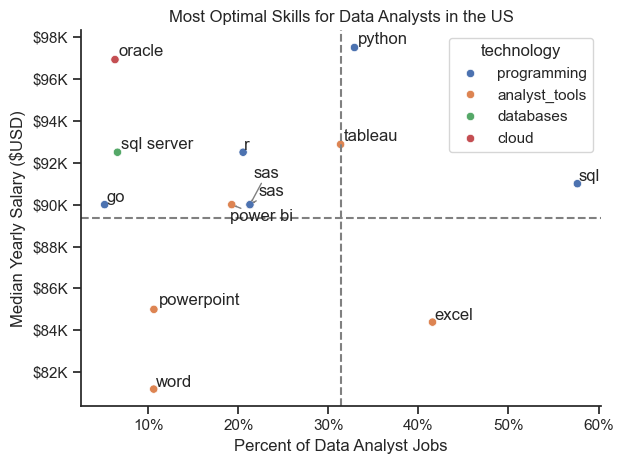

In [15]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts=[]

for i, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], txt))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${y / 1000:.0f}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

# Get axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Calculate midpoints
x_mid = (x_min + x_max) / 2
y_mid = (y_min + y_max) / 2

plt.axvline(x=x_mid, color='grey', linestyle='--')
plt.axhline(y=y_mid, color='grey', linestyle='--')

plt.tight_layout()
plt.show()